### Housing Price Prediction (Univariate & Multivariate Linear Regression Implementation From Scratch)

Haixiao (Harry) Feng

-

Dependencies & Utilities

In [1]:
# Utlity
import pandas as pd
import numpy as np
import os
import warnings
from google.colab import drive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'             # allows multiple visualizations in one cell

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'axes.facecolor':'#f2f2f2', 'figure.facecolor':'#eaeaea'})  # Sets global theme

In [3]:
# Mount gDrive
pathRoot = '/content/drive/'
drive.mount(pathRoot, force_remount=True)

-

Custom Functions

In [4]:
# Computes cost J (Linear Regression Cost Function)
def UMLRCost(X, y, theta):
    return (np.sum((X.dot(theta)-y)**2))/(2*(y.shape[0]))

In [5]:
# Computes global optima (Linear Regression Gradient Descent)
def UMLRGradDesc(X, y, theta, alpha, numIters):
    theta = theta.copy()                        # Copy of theta for iterative update
    JHistory = []
    for i in range(numIters):
        theta = theta-(alpha*((np.dot(X.T,(np.dot(X,theta)-y)))/y.shape[0]))
        JHistory.append(UMLRCost(X, y, theta))  # Store cost J from each iteration
    return theta, JHistory

In [6]:
def UMLRNormalEq(X, y):
    return (np.linalg.pinv(X.T.dot(X))).dot(X.T).dot(y)

In [7]:
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(masterDF.col1.values.reshape(-1,1), 
#             masterDF.col2.values.reshape(-1,1))
# lin_reg.intercept_, lin_reg.coef_

In [8]:
def featureNorm(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [9]:
# Surface plot
def surfaceAndContourPlots(theta0Vals, theta1Vals, JVals):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(theta0Vals, theta1Vals, JVals, cmap='viridis')
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title('Surface Plot')
    ax = plt.subplot(122)
    plt.contour(theta0Vals, theta1Vals, JVals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
    plt.plot(theta[0], theta[1], 'ro', color='#8c00ff', ms=10, lw=1)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.title('Contour Plot')

In [10]:
# Contour plot
# Plots JVals as 15 contours spaced logarithmically between 0.01 and 100
def contourPlot(theta0Vals, theta1Vals, JVals):
    plt.contour(theta0Vals, theta1Vals, JVals, linewidths=2, cmap='plasma', levels=np.logspace(-2, 3, 20))
    plt.plot(theta[0], theta[1], 'ro', color='#8c00ff', ms=10, lw=1)
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('Contour Plot')

-

-

### Univariate Linear Regression (Predict Profit Based On Population)

Data & Preparation

In [11]:
pathFolder = '/My Drive/Notes/Technical/ML&Application/Algorithm&Tuning/Regression&Regularization/MLR/'
pathDataset = 'Data1.txt'
pathFull = pathRoot+pathFolder+pathDataset

In [12]:
# Read data
rawData1 = np.loadtxt(pathFull, delimiter=',')
masterDF1 = pd.DataFrame(rawData1, columns=['Population', 'Profit'])
masterDF1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
# Prepare data for training
X, y = masterDF1.iloc[:,0], masterDF1.iloc[:,1]     # variable split
X = np.stack([np.ones(y.shape[0]), X], axis=1)      # Create matrix for vectorized calculation (add intercept term)
theta = np.zeros(2)                                 # Initialize fitting param

-

Train & Predict

In [14]:
# Run Gradient Descent to find global optima (values for theta)
numIters = 1500     # Set num iterations
alpha = 0.01        # Set alpha
theta, Jistory = UMLRGradDesc(X, y, theta, alpha, numIters)
print('Theta found using Gradient Descent: {:.4f}, {:.4f}'.format(*theta))

Theta found using Gradient Descent: -3.6303, 1.1664


In [15]:
# Viz Gradient Descent
theta0Vals = np.linspace(-10, 10, 100)                          # grid over which we will calculate J
theta1Vals = np.linspace(-1, 4, 100)                            # grid over which we will calculate J
JVals = np.zeros((theta0Vals.shape[0], theta1Vals.shape[0]))    # initialize J_vals to a matrix of 0's
for i, theta0 in enumerate(theta0Vals):                         # Fill out J_vals
    for j, theta1 in enumerate(theta1Vals):
        JVals[i, j] = UMLRCost(X, y, [theta0, theta1])
JVals = JVals.T                                                 # To use meshgrids work in surf command, transpose J_vals before calling (or else axes will be flipped)

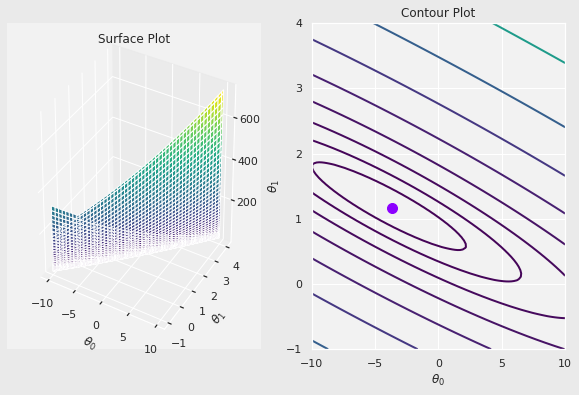

In [16]:
surfaceAndContourPlots(theta0Vals, theta1Vals, JVals)       # Surface & contour plots

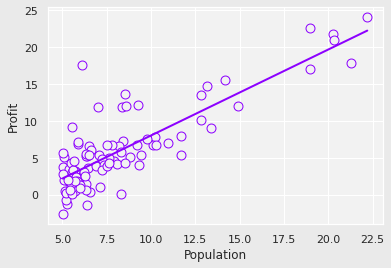

In [17]:
# viz linear fit
sns.scatterplot(data=masterDF1, x='Population', y='Profit', linewidth=1, s=80, edgecolor='#8c00ff', color='#f2f2f2')
sns.lineplot(x=X[:, 1], y=np.dot(X, theta), linewidth=2, color='#8c00ff')

In [18]:
# Predict
yHat = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(yHat*10000))

For population = 35,000, we predict a profit of 4519.77



-


### Multivariate Linear Regression (Predict Housig Prices Based On Area and Number of Bedrooms)

Data & Preparation

In [19]:
pathFolder = '/My Drive/Notes/Technical/ML&Application/Algorithm&Tuning/Regression&Regularization/MLR/'
pathDataset = 'Data2.txt'
pathFull = pathRoot+pathFolder+pathDataset

In [20]:
# Read data
rawData2 = np.loadtxt(pathFull, delimiter=',')
masterDF2 = pd.DataFrame(rawData2, columns=['SquareFeet', 'numBedrooms', 'Price'])
masterDF2.head()

,SquareFeet,numBedrooms,Price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


In [21]:
X = masterDF2.iloc[:, :2]
y = masterDF2.iloc[:, 2]

In [22]:
# Prepare data for training
X, y = masterDF2.iloc[:,:2], masterDF2.iloc[:,2]                # variable split
XNorm, mu, sigma = featureNorm(X)
X = np.concatenate([np.ones((y.shape[0], 1)), XNorm], axis=1)   # Create matrix for vectorized calculation (add intercept term)
theta = np.zeros(3)                                             # Initialize fitting param

In [23]:
print('Computed mean:')
mu
print('\n')
print('Computed standard deviation:')
sigma
print('\n')
XNorm[['SquareFeet', 'numBedrooms']].describe().T

Computed mean:


SquareFeet     2000.680851
numBedrooms       3.170213
dtype: float64



Computed standard deviation:


SquareFeet     794.702354
numBedrooms      0.760982
dtype: float64

,count,mean,std,min,25%,50%,75%,max
SquareFeet,47.0,1.889741e-17,1.0,-1.445423,-0.715590,-0.141790,0.337635,3.117292
numBedrooms,47.0,2.279500e-16,1.0,-2.851859,-0.223675,-0.223675,1.090417,2.404508


-

Train & Predict

Text(0.5, 0, 'Number of Iterations')

Text(0, 0.5, 'Cost J')

Text(0.5, 1.0, 'Learning Rate Alpha')

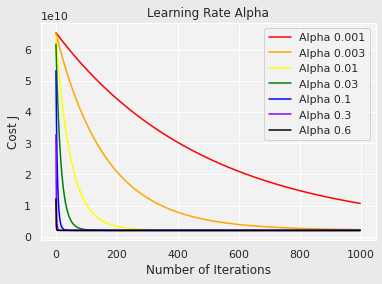

In [24]:
# Find optimal alpha (learning rate)
alphaList = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.6]
colorsList = ['red','orange','yellow','green', 'blue', '#8c00ff', 'black', ]
numIters = 1000

for i in range(0, len(alphaList)):
    theta = np.zeros(3)
    theta, J_history = UMLRGradDesc(X, y, theta, alphaList[i], numIters)
    plt.plot(range(len(J_history)), J_history, colorsList[i], label='Alpha {}'.format(alphaList[i]))
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Learning Rate Alpha')
plt.legend()
plt.show()

In [25]:
# Run Gradient Descent to find global optima (values for theta)
numIters = 1500     # Set num iterations
alpha = 0.6         # Set alpha
theta, _ = UMLRGradDesc(X, y, theta, alpha, numIters)
print('Theta found using Gradient Descent: {:.4f}, {:.4f}'.format(*theta))
# print(theta)

Theta found using Gradient Descent: 340412.6596, 110631.0503


In [29]:
sqft = (1650-mu[0])/sigma[0]        # Normalize feature input
numBedrooms = (3-mu[1])/sigma[1]    # Normalize feature input
yHat = theta[0] + theta[1]*sqft + theta[2]*numBedrooms
print('Houses 1650 square feet in area with 3 bedrooms have a predictated price of: $'+str(round(yHat)))

Houses 1650 square feet in area with 3 bedrooms have a predictated price of: $293081


-

Alternative, use the Normal Equations Method To Find Best Fit Parameters

In [30]:
Xe = np.hstack((np.ones((y.shape[0], 1)), masterDF2[['SquareFeet', 'numBedrooms']].values))
thetaNormEq = UMLRNormalEq(Xe, y)
yHat = thetaNormEq[0] + thetaNormEq[1]*1650 + thetaNormEq[2]*3
print('Houses 1650 square feet in area with 3 bedrooms have a predictated price of: $'+str(round(yHat)))

Houses 1650 square feet in area with 3 bedrooms have a predictated price of: $293081
